Build a regression model.

In [20]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming concatenated_data contains your combined dataset

predictors = concatenated_data[['distance_meters_foursquare', 'distance_meters_yelp']]
target = concatenated_data['available_bikes_citybikes']

# Adding a constant for the intercept term
predictors = sm.add_constant(predictors)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Getting the summary of the model
print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     available_bikes_citybikes   R-squared:                       0.035
Model:                                   OLS   Adj. R-squared:                 -0.005
Method:                        Least Squares   F-statistic:                    0.8757
Date:                       Wed, 13 Dec 2023   Prob (F-statistic):              0.423
Time:                               04:07:49   Log-Likelihood:                -117.04
No. Observations:                         52   AIC:                             240.1
Df Residuals:                             49   BIC:                             245.9
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

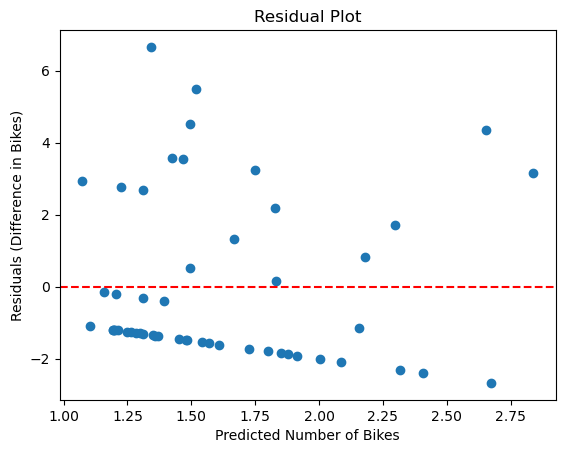

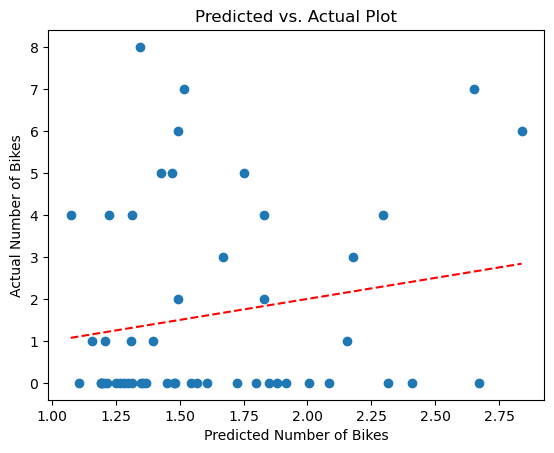

In [24]:
# Residual plot
plt.scatter(model.predict(X_train), model.resid)
plt.xlabel("Predicted Number of Bikes")
plt.ylabel("Residuals (Difference in Bikes)")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')  # Adding a horizontal line at y=0
plt.show()

# Predicted vs. actual plot
plt.scatter(model.predict(X_train), y_train)
plt.xlabel("Predicted Number of Bikes")
plt.ylabel("Actual Number of Bikes")
plt.title("Predicted vs. Actual Plot")
plt.plot([min(model.predict(X_train)), max(model.predict(X_train))], [min(model.predict(X_train)), max(model.predict(X_train))], color='red', linestyle='--')  # Adding a diagonal line
plt.show()

Provide model output and an interpretation of the results. 

Based on the results of our regression model, it looks like that the coefficients indicate that our model's independent variable on the available bikes on the distance of each POIs is not statistically significant. We can examing small coefficient numbers (0.0022 for distance_meters_forsquare and 0.0012 for distance_meters_yelp) and their associated p-values are high which indicates that these predictors are not significant in predicting the available bikes in the area. We can also see that got a high p-value(F-static) (0.423) which is much higher than the usual significance level of 0.05. This means that the overall importance of the model is not very significant. To summarized, this current model that compares the distances of POIs and their relationship with how many number of bikes that is available appears to be very insignificant. Many factors might had affected this result. Other characteristics that we can pull from the different APIs that we chose to not include or drop may enhance this model, or it could be possible that the POI distances are just not a strong enough indicators for bike availability. 



# Stretch

How can you turn the regression model into a classification model?

To transform our regression model into a classification model we must convert our available bikes value into a categorical label. This could be done using a high, medium or low availability of bikes in the area. We can assign a numerical range for each of these types of availability rank such as, 0-3 being low or having 10+ being high.